#Importing Libraries & Loading Data

In [1]:
import pandas as pd

In [2]:
main = pd.read_csv("malicious_phish.csv")
main

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [3]:
import pandas as pd

# Define a list of file paths and corresponding types
file_paths = [
    ("Benign_list_big_final.csv", "benign"),
    ("DefacementSitesURLFiltered.csv", "defacement"),
    ("Malware_dataset.csv", "malware"),
    ("phishing_dataset.csv", "phishing"),
    ("spam_dataset.csv", "spam")
]

# Initialize an empty list to store dataframes
dfs = []

# Iterate through the file paths and types
for file_path, url_type in file_paths:
    # Read the CSV file
    df = pd.read_csv(file_path, header=None)
    # Assign column names
    df.columns = ["url"]
    # Add a column for the URL type
    df["type"] = url_type
    # Append the dataframe to the list
    dfs.append(df)

dfs.append(main)
# Concatenate the list of dataframes into a single dataframe
merged_df = pd.concat(dfs, ignore_index=True)
merged_df.drop_duplicates(inplace=True)
merged_df.reset_index(drop=True, inplace=True)

# Display the merged dataframe
merged_df.head(100000)

,url,type
0,http://1337x.to/torrent/1048648/American-Snipe...,benign
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign
...,...,...
99995,http://www.ccent.com.au/index.php?view=article...,defacement
99996,http://www.ccent.com.au/index.php?option=com_c...,defacement
99997,http://www.ccent.com.au/index.php?option=com_m...,defacement
99998,http://www.ccent.com.au/index.php?view=article...,defacement


In [4]:
merged_df

,url,type
0,http://1337x.to/torrent/1048648/American-Snipe...,benign
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign
...,...,...
653041,xbox360.ign.com/objects/850/850402.html,phishing
653042,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
653043,www.gamespot.com/xbox360/action/deadspace/,phishing
653044,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [5]:
url_df = merged_df

#Data Exploration & Initial Preprocessing

In [6]:
url_df["type"].value_counts()

,count
type,
benign,428080
defacement,95308
phishing,94092
malware,23645
spam,11921


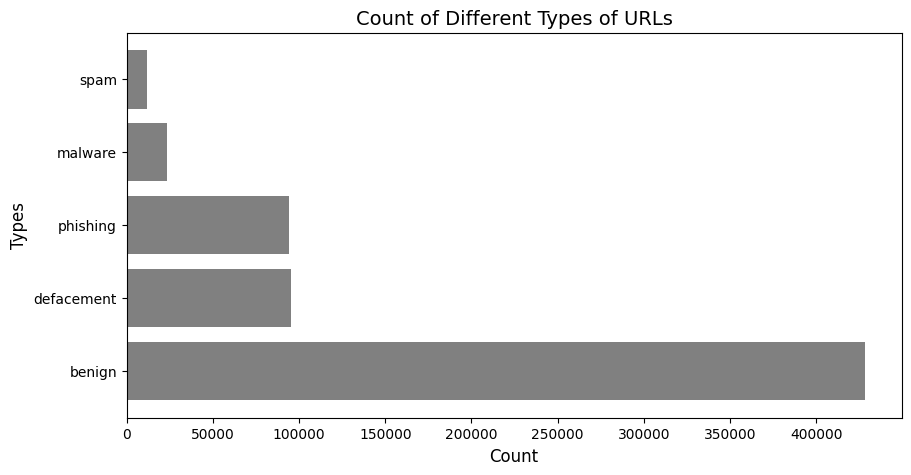

In [7]:
import matplotlib.pyplot as plt

count = url_df["type"].value_counts()

plt.figure(figsize=(10, 5))
plt.barh(count.index, count.values, color='gray')  # Simple gray bars

plt.xlabel('Count', fontsize=12)
plt.ylabel('Types', fontsize=12)
plt.title('Count of Different Types of URLs', fontsize=14)

plt.show()


In [8]:
url_df["url"] = url_df["url"].replace("www","",regex=True)

url_df.head()

,url,type
0,http://1337x.to/torrent/1048648/American-Snipe...,benign
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign


In [9]:
url_df["url_type"] = url_df["type"].replace({
    'benign':0,
    'defacement':1,
    'phishing':2,
    'malware':3,
    'spam':4
});

<ipython-input-9-7b9b66f2685a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  url_df["url_type"] = url_df["type"].replace({


In [10]:
def get_url_length(url):
    # Remove common prefixes
    prefixes = ['http://', 'https://']
    for prefix in prefixes:
        if url.startswith(prefix):
            url = url[len(prefix):]

    # Remove 'www.' if present
    url = url.replace('www.', '')

    # Return the length of the remaining URL
    return len(url)

#Feature Engineering & Data Cleaning

In [11]:
url_df['url_len'] = url_df['url'].apply(lambda x: get_url_length(str(x)))
url_df

,url,type,url_type,url_len
0,http://1337x.to/torrent/1048648/American-Snipe...,benign,0,76
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,0,76
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,0,76
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,0,76
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,0,76
...,...,...,...,...
653041,xbox360.ign.com/objects/850/850402.html,phishing,2,39
653042,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,44
653043,.gamespot.com/xbox360/action/deadspace/,phishing,2,39
653044,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,45


In [12]:
pip install tldextract tld

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 26.6 MB/s eta 0:00:00


In [13]:
from tldextract import extract as tld_extract
from tld import get_tld, is_tld
from tld.exceptions import TldDomainNotFound, TldBadUrl, TldIOError

def extract_pri_domain(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain
url_df['pri_domain'] = url_df['url'].apply(lambda x: extract_pri_domain(x))
url_df


,url,type,url_type,url_len,pri_domain
0,http://1337x.to/torrent/1048648/American-Snipe...,benign,0,76,1337x.to
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,0,76,1337x.to
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,0,76,1337x.to
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,0,76,1337x.to
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,0,76,1337x.to
...,...,...,...,...,...
653041,xbox360.ign.com/objects/850/850402.html,phishing,2,39,xbox360.ign.com
653042,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,44,games.teamxbox.com
653043,.gamespot.com/xbox360/action/deadspace/,phishing,2,39,.gamespot.com
653044,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,45,en.wikipedia.org


In [14]:
import string

def count_letters(url):
    num_letters = sum(char.isalpha() for char in url)
    return num_letters

def count_digits(url):
    num_digits = sum(char.isdigit() for char in url)
    return num_digits

def count_special_chars(url):
    special_chars = set(string.punctuation)
    num_special_chars = sum(char in special_chars for char in url)
    return num_special_chars
url_df['letters_count'] = url_df['url'].apply(lambda x: count_letters(x))
url_df['digits_count'] = url_df['url'].apply(lambda x: count_digits(x))
url_df['special_chars_count'] = url_df['url'].apply(lambda x: count_special_chars(x))
url_df

,url,type,url_type,url_len,pri_domain,letters_count,digits_count,special_chars_count
0,http://1337x.to/torrent/1048648/American-Snipe...,benign,0,76,1337x.to,49,18,16
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,0,76,1337x.to,43,23,17
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,0,76,1337x.to,44,22,17
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,0,76,1337x.to,46,18,19
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,0,76,1337x.to,48,18,17
...,...,...,...,...,...,...,...,...
653041,xbox360.ign.com/objects/850/850402.html,phishing,2,39,xbox360.ign.com,21,12,6
653042,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,44,games.teamxbox.com,29,7,8
653043,.gamespot.com/xbox360/action/deadspace/,phishing,2,39,.gamespot.com,30,3,6
653044,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,45,en.wikipedia.org,36,0,9


In [15]:
import re

def has_shortening_service(url):
    pattern = re.compile(r'https?://(?:www\.)?(?:\w+\.)*(\w+)\.\w+')
    match = pattern.search(url)

    if match:
        domain = match.group(1)
        common_shortening_services = ['bit', 'goo', 'tinyurl', 'ow', 't', 'is',
                                      'cli', 'yfrog', 'migre', 'ff', 'url4', 'twit',
                                      'su', 'snipurl', 'short', 'BudURL', 'ping',
                                      'post', 'Just', 'bkite', 'snipr', 'fic',
                                      'loopt', 'doiop', 'short', 'kl', 'wp',
                                      'rubyurl', 'om', 'to', 'bit', 't', 'lnkd',
                                      'db', 'qr', 'adf', 'goo', 'bitly', 'cur',
                                      'tinyurl', 'ow', 'bit', 'ity', 'q', 'is',
                                      'po', 'bc', 'twitthis', 'u', 'j', 'buzurl',
                                      'cutt', 'u', 'yourls', 'x', 'prettylinkpro',
                                      'scrnch', 'filoops', 'vzturl', 'qr', '1url',
                                      'tweez', 'v', 'tr', 'link', 'zip']

        if domain.lower() in common_shortening_services:
            return 1
    return 0
url_df['shortened']  = url_df['url'].apply(lambda x: has_shortening_service(x))
url_df.head()

,url,type,url_type,url_len,pri_domain,letters_count,digits_count,special_chars_count,shortened
0,http://1337x.to/torrent/1048648/American-Snipe...,benign,0,76,1337x.to,49,18,16,0
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,0,76,1337x.to,43,23,17,0
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,0,76,1337x.to,44,22,17,0
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,0,76,1337x.to,46,18,19,0
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,0,76,1337x.to,48,18,17,0


In [16]:
from urllib.parse import urlparse

def abnormal_url(url):
    parsed_url = urlparse(url)
    netloc = parsed_url.netloc

    if netloc:
        netloc = str(netloc)
        match = re.search(netloc,url)

        if match:
            return 1
    return 0
url_df["abnormal_url"] = url_df["url"].apply(lambda x: abnormal_url(x))
url_df

,url,type,url_type,url_len,pri_domain,letters_count,digits_count,special_chars_count,shortened,abnormal_url
0,http://1337x.to/torrent/1048648/American-Snipe...,benign,0,76,1337x.to,49,18,16,0,1
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,0,76,1337x.to,43,23,17,0,1
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,0,76,1337x.to,44,22,17,0,1
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,0,76,1337x.to,46,18,19,0,1
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,0,76,1337x.to,48,18,17,0,1
...,...,...,...,...,...,...,...,...,...,...
653041,xbox360.ign.com/objects/850/850402.html,phishing,2,39,xbox360.ign.com,21,12,6,0,0
653042,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,44,games.teamxbox.com,29,7,8,0,0
653043,.gamespot.com/xbox360/action/deadspace/,phishing,2,39,.gamespot.com,30,3,6,0,0
653044,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,45,en.wikipedia.org,36,0,9,0,0


In [17]:
def secure_http(url):
    return int(urlparse(url).scheme == 'https')
url_df['secure_http']  = url_df['url'].apply(lambda x: secure_http(x))
import ipaddress
def have_ip_address(url):
    try:
        parsed_url = urlparse(url)
        if parsed_url.hostname:
            ip = ipaddress.ip_address(parsed_url.hostname)
            return isinstance(ip, (ipaddress.IPv4Address, ipaddress.IPv6Address))
    except ValueError:
        pass  # Invalid hostname or IP address

    return 0
url_df['have_ip']  = url_df['url'].apply(lambda x: have_ip_address(x))
url_df

,url,type,url_type,url_len,pri_domain,letters_count,digits_count,special_chars_count,shortened,abnormal_url,secure_http,have_ip
0,http://1337x.to/torrent/1048648/American-Snipe...,benign,0,76,1337x.to,49,18,16,0,1,0,0
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,0,76,1337x.to,43,23,17,0,1,0,0
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,0,76,1337x.to,44,22,17,0,1,0,0
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,0,76,1337x.to,46,18,19,0,1,0,0
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,0,76,1337x.to,48,18,17,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
653041,xbox360.ign.com/objects/850/850402.html,phishing,2,39,xbox360.ign.com,21,12,6,0,0,0,0
653042,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,44,games.teamxbox.com,29,7,8,0,0,0,0
653043,.gamespot.com/xbox360/action/deadspace/,phishing,2,39,.gamespot.com,30,3,6,0,0,0,0
653044,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,45,en.wikipedia.org,36,0,9,0,0,0,0


In [18]:
url_df.isnull().sum()

,0
url,0
type,0
url_type,0
url_len,0
pri_domain,12248
letters_count,0
digits_count,0
special_chars_count,0
shortened,0
abnormal_url,0


In [19]:
url_df.fillna(0,inplace=True)
url_df.isnull().sum()

,0
url,0
type,0
url_type,0
url_len,0
pri_domain,0
letters_count,0
digits_count,0
special_chars_count,0
shortened,0
abnormal_url,0


#Data Transformation & Handling Missing Values

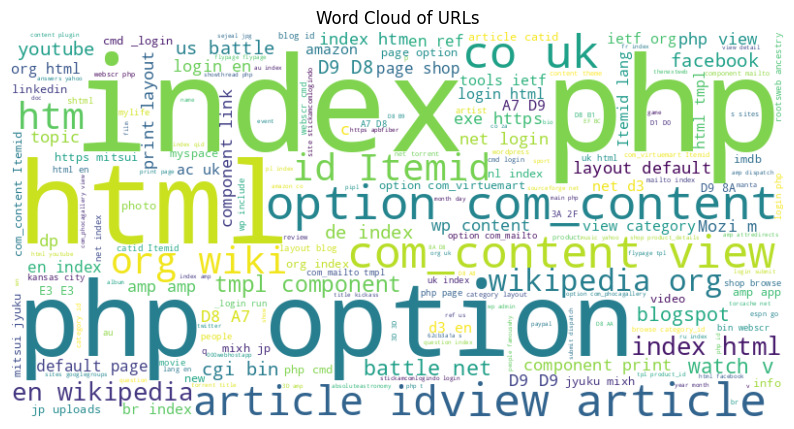

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud # Import the WordCloud class

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(url_df['url']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of URLs')
plt.show()

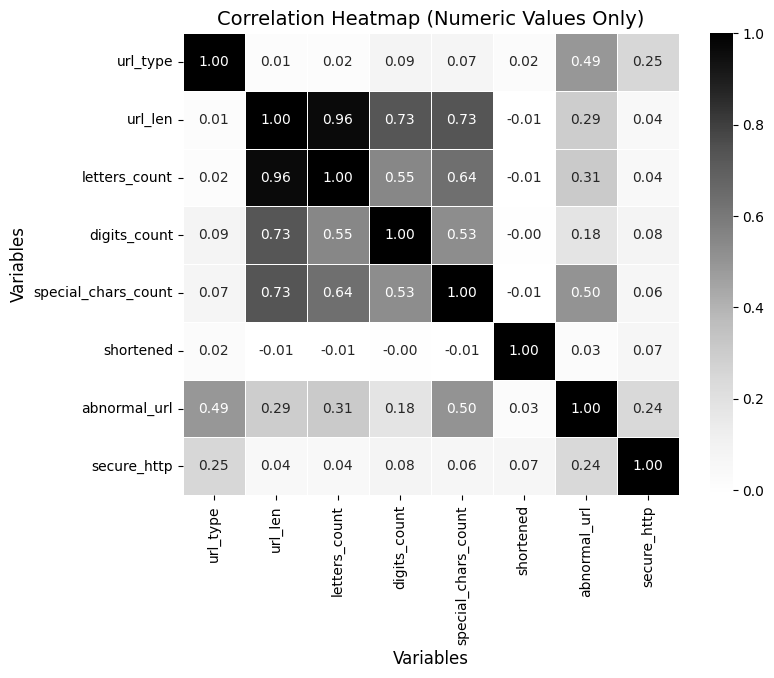

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract numeric data and calculate correlation
numeric_data = url_df.select_dtypes(include='number')
corr_matrix = numeric_data.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="Greys", fmt=".2f", linewidths=0.5)

# Labels and title
plt.title("Correlation Heatmap (Numeric Values Only)", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)

# Show the plot
plt.show()


In [22]:
def get_url_region(primary_domain):
    ccTLD_to_region = {
    ".ac": "Ascension Island",
    ".ad": "Andorra",
    ".ae": "United Arab Emirates",
    ".af": "Afghanistan",
    ".ag": "Antigua and Barbuda",
    ".ai": "Anguilla",
    ".al": "Albania",
    ".am": "Armenia",
    ".an": "Netherlands Antilles",
    ".ao": "Angola",
    ".aq": "Antarctica",
    ".ar": "Argentina",
    ".as": "American Samoa",
    ".at": "Austria",
    ".au": "Australia",
    ".aw": "Aruba",
    ".ax": "Åland Islands",
    ".az": "Azerbaijan",
    ".ba": "Bosnia and Herzegovina",
    ".bb": "Barbados",
    ".bd": "Bangladesh",
    ".be": "Belgium",
    ".bf": "Burkina Faso",
    ".bg": "Bulgaria",
    ".bh": "Bahrain",
    ".bi": "Burundi",
    ".bj": "Benin",
    ".bm": "Bermuda",
    ".bn": "Brunei Darussalam",
    ".bo": "Bolivia",
    ".br": "Brazil",
    ".bs": "Bahamas",
    ".bt": "Bhutan",
    ".bv": "Bouvet Island",
    ".bw": "Botswana",
    ".by": "Belarus",
    ".bz": "Belize",
    ".ca": "Canada",
    ".cc": "Cocos Islands",
    ".cd": "Democratic Republic of the Congo",
    ".cf": "Central African Republic",
    ".cg": "Republic of the Congo",
    ".ch": "Switzerland",
    ".ci": "Côte d'Ivoire",
    ".ck": "Cook Islands",
    ".cl": "Chile",
    ".cm": "Cameroon",
    ".cn": "China",
    ".co": "Colombia",
    ".cr": "Costa Rica",
    ".cu": "Cuba",
    ".cv": "Cape Verde",
    ".cw": "Curaçao",
    ".cx": "Christmas Island",
    ".cy": "Cyprus",
    ".cz": "Czech Republic",
    ".de": "Germany",
    ".dj": "Djibouti",
    ".dk": "Denmark",
    ".dm": "Dominica",
    ".do": "Dominican Republic",
    ".dz": "Algeria",
    ".ec": "Ecuador",
    ".ee": "Estonia",
    ".eg": "Egypt",
    ".er": "Eritrea",
    ".es": "Spain",
    ".et": "Ethiopia",
    ".eu": "European Union",
    ".fi": "Finland",
    ".fj": "Fiji",
    ".fk": "Falkland Islands",
    ".fm": "Federated States of Micronesia",
    ".fo": "Faroe Islands",
    ".fr": "France",
    ".ga": "Gabon",
    ".gb": "United Kingdom",
    ".gd": "Grenada",
    ".ge": "Georgia",
    ".gf": "French Guiana",
    ".gg": "Guernsey",
    ".gh": "Ghana",
    ".gi": "Gibraltar",
    ".gl": "Greenland",
    ".gm": "Gambia",
    ".gn": "Guinea",
    ".gp": "Guadeloupe",
    ".gq": "Equatorial Guinea",
    ".gr": "Greece",
    ".gs": "South Georgia and the South Sandwich Islands",
    ".gt": "Guatemala",
    ".gu": "Guam",
    ".gw": "Guinea-Bissau",
    ".gy": "Guyana",
    ".hk": "Hong Kong",
    ".hm": "Heard Island and McDonald Islands",
    ".hn": "Honduras",
    ".hr": "Croatia",
    ".ht": "Haiti",
    ".hu": "Hungary",
    ".id": "Indonesia",
    ".ie": "Ireland",
    ".il": "Israel",
    ".im": "Isle of Man",
    ".in": "India",
    ".io": "British Indian Ocean Territory",
    ".iq": "Iraq",
    ".ir": "Iran",
    ".is": "Iceland",
    ".it": "Italy",
    ".je": "Jersey",
    ".jm": "Jamaica",
    ".jo": "Jordan",
    ".jp": "Japan",
    ".ke": "Kenya",
    ".kg": "Kyrgyzstan",
    ".kh": "Cambodia",
    ".ki": "Kiribati",
    ".km": "Comoros",
    ".kn": "Saint Kitts and Nevis",
    ".kp": "Democratic People's Republic of Korea (North Korea)",
    ".kr": "Republic of Korea (South Korea)",
    ".kw": "Kuwait",
    ".ky": "Cayman Islands",
    ".kz": "Kazakhstan",
    ".la": "Laos",
    ".lb": "Lebanon",
    ".lc": "Saint Lucia",
    ".li": "Liechtenstein",
    ".lk": "Sri Lanka",
    ".lr": "Liberia",
    ".ls": "Lesotho",
    ".lt": "Lithuania",
    ".lu": "Luxembourg",
    ".lv": "Latvia",
    ".ly": "Libya",
    ".ma": "Morocco",
    ".mc": "Monaco",
    ".md": "Moldova",
    ".me": "Montenegro",
    ".mf": "Saint Martin (French part)",
    ".mg": "Madagascar",
    ".mh": "Marshall Islands",
    ".mk": "North Macedonia",
    ".ml": "Mali",
    ".mm": "Myanmar",
    ".mn": "Mongolia",
    ".mo": "Macao",
    ".mp": "Northern Mariana Islands",
    ".mq": "Martinique",
    ".mr": "Mauritania",
    ".ms": "Montserrat",
    ".mt": "Malta",
    ".mu": "Mauritius",
    ".mv": "Maldives",
    ".mw": "Malawi",
    ".mx": "Mexico",
    ".my": "Malaysia",
    ".mz": "Mozambique",
    ".na": "Namibia",
    ".nc": "New Caledonia",
    ".ne": "Niger",
    ".nf": "Norfolk Island",
    ".ng": "Nigeria",
    ".ni": "Nicaragua",
    ".nl": "Netherlands",
    ".no": "Norway",
    ".np": "Nepal",
    ".nr": "Nauru",
    ".nu": "Niue",
    ".nz": "New Zealand",
    ".om": "Oman",
    ".pa": "Panama",
    ".pe": "Peru",
    ".pf": "French Polynesia",
    ".pg": "Papua New Guinea",
    ".ph": "Philippines",
    ".pk": "Pakistan",
    ".pl": "Poland",
    ".pm": "Saint Pierre and Miquelon",
    ".pn": "Pitcairn",
    ".pr": "Puerto Rico",
    ".ps": "Palestinian Territory",
    ".pt": "Portugal",
    ".pw": "Palau",
    ".py": "Paraguay",
    ".qa": "Qatar",
    ".re": "Réunion",
    ".ro": "Romania",
    ".rs": "Serbia",
    ".ru": "Russia",
    ".rw": "Rwanda",
    ".sa": "Saudi Arabia",
    ".sb": "Solomon Islands",
    ".sc": "Seychelles",
    ".sd": "Sudan",
    ".se": "Sweden",
    ".sg": "Singapore",
    ".sh": "Saint Helena",
    ".si": "Slovenia",
    ".sj": "Svalbard and Jan Mayen",
    ".sk": "Slovakia",
    ".sl": "Sierra Leone",
    ".sm": "San Marino",
    ".sn": "Senegal",
    ".so": "Somalia",
    ".sr": "Suriname",
    ".ss": "South Sudan",
    ".st": "São Tomé and Príncipe",
    ".sv": "El Salvador",
    ".sx": "Sint Maarten (Dutch part)",
    ".sy": "Syria",
    ".sz": "Eswatini",
    ".tc": "Turks and Caicos Islands",
    ".td": "Chad",
    ".tf": "French Southern Territories",
    ".tg": "Togo",
    ".th": "Thailand",
    ".tj": "Tajikistan",
    ".tk": "Tokelau",
    ".tl": "Timor-Leste",
    ".tm": "Turkmenistan",
    ".tn": "Tunisia",
    ".to": "Tonga",
    ".tr": "Turkey",
    ".tt": "Trinidad and Tobago",
    ".tv": "Tuvalu",
    ".tw": "Taiwan",
    ".tz": "Tanzania",
    ".ua": "Ukraine",
    ".ug": "Uganda",
    ".uk": "United Kingdom",
    ".us": "United States",
    ".uy": "Uruguay",
    ".uz": "Uzbekistan",
    ".va": "Vatican City",
    ".vc": "Saint Vincent and the Grenadines",
    ".ve": "Venezuela",
    ".vg": "British Virgin Islands",
    ".vi": "U.S. Virgin Islands",
    ".vn": "Vietnam",
    ".vu": "Vanuatu",
    ".wf": "Wallis and Futuna",
    ".ws": "Samoa",
    ".ye": "Yemen",
    ".yt": "Mayotte",
    ".za": "South Africa",
    ".zm": "Zambia",
    ".zw": "Zimbabwe"
    }

    for ccTLD in ccTLD_to_region:
        if primary_domain.endswith(ccTLD):
            return ccTLD_to_region[ccTLD]

    return "Global"

In [23]:
url_df['url_region'] = url_df['pri_domain'].apply(lambda x: get_url_region(str(x)))
url_df.head()

,url,type,url_type,url_len,pri_domain,letters_count,digits_count,special_chars_count,shortened,abnormal_url,secure_http,have_ip,url_region
0,http://1337x.to/torrent/1048648/American-Snipe...,benign,0,76,1337x.to,49,18,16,0,1,0,0,Tonga
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,0,76,1337x.to,43,23,17,0,1,0,0,Tonga
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,0,76,1337x.to,44,22,17,0,1,0,0,Tonga
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,0,76,1337x.to,46,18,19,0,1,0,0,Tonga
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,0,76,1337x.to,48,18,17,0,1,0,0,Tonga


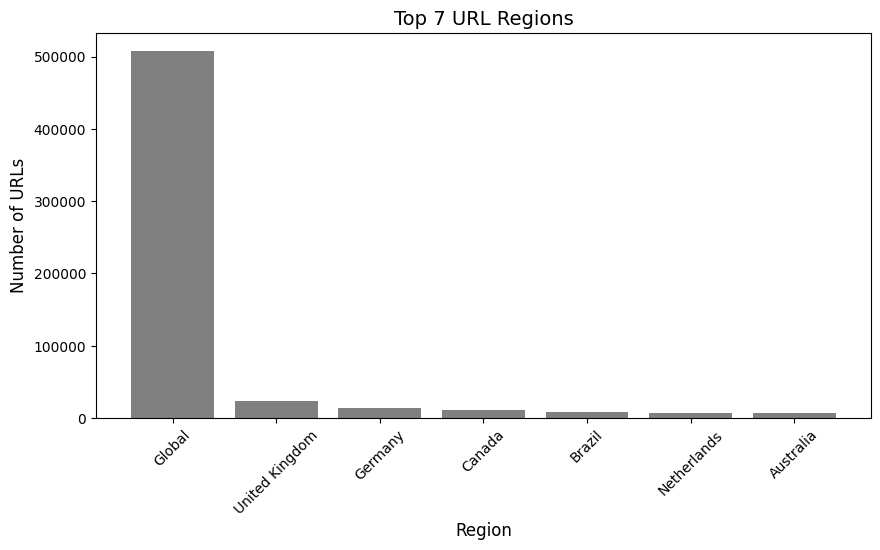

In [24]:
import matplotlib.pyplot as plt

# Count occurrences of each region
region_counts = url_df["url_region"].value_counts()

# Select the top 7 regions
top_regions = region_counts.head(7)

# Create a vertical bar chart
plt.figure(figsize=(10, 5))
plt.bar(top_regions.index, top_regions.values, color='gray')  # Simple gray bars

# Labels and title
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of URLs', fontsize=12)
plt.title('Top 7 URL Regions', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [25]:
def extract_root_domain(url):
    # Import tldextract inside the function to ensure it's available
    import tldextract
    extracted = tldextract.extract(url)
    root_domain = extracted.domain
    return root_domain
url_df['root_domain'] = url_df['pri_domain'].apply(lambda x: extract_root_domain(str(x)))
url_df.isnull().sum()

,0
url,0
type,0
url_type,0
url_len,0
pri_domain,0
letters_count,0
digits_count,0
special_chars_count,0
shortened,0
abnormal_url,0


In [26]:
url_df.shape

(653046, 14)

In [27]:
url_df.duplicated().sum()

np.int64(6)

In [28]:
url_df.drop_duplicates(inplace=True)
url_df.columns

Index(['url', 'type', 'url_type', 'url_len', 'pri_domain', 'letters_count',
       'digits_count', 'special_chars_count', 'shortened', 'abnormal_url',
       'secure_http', 'have_ip', 'url_region', 'root_domain'],
      dtype='object')

In [29]:
data = url_df.drop(columns=['url','type','pri_domain'])
data.head()

,url_type,url_len,letters_count,digits_count,special_chars_count,shortened,abnormal_url,secure_http,have_ip,url_region,root_domain
0,0,76,49,18,16,0,1,0,0,Tonga,1337x
1,0,76,43,23,17,0,1,0,0,Tonga,1337x
2,0,76,44,22,17,0,1,0,0,Tonga,1337x
3,0,76,46,18,19,0,1,0,0,Tonga,1337x
4,0,76,48,18,17,0,1,0,0,Tonga,1337x


#Exploratory Data Analysis (EDA) & Feature Selection

In [30]:
len(data['root_domain'].value_counts())

147335

In [31]:
import hashlib

def hash_encode(category):
    hash_object = hashlib.md5(category.encode())
    return int(hash_object.hexdigest(), 16) % (10 ** 8)
data['root_domain'] = data['root_domain'].apply(hash_encode)
data['url_region'] = data['url_region'].apply(hash_encode)
data.head()

,url_type,url_len,letters_count,digits_count,special_chars_count,shortened,abnormal_url,secure_http,have_ip,url_region,root_domain
0,0,76,49,18,16,0,1,0,0,85349296,75121542
1,0,76,43,23,17,0,1,0,0,85349296,75121542
2,0,76,44,22,17,0,1,0,0,85349296,75121542
3,0,76,46,18,19,0,1,0,0,85349296,75121542
4,0,76,48,18,17,0,1,0,0,85349296,75121542


In [32]:
from sklearn.model_selection import train_test_split

x = data.drop(columns=["url_type"])
y = data["url_type"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

print(f"X_train Shape : {x_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {x_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

X_train Shape : (457128, 10)
Y_train Shape : (457128,)
X_test  Shape : (195912, 10)
Y_test  Shape : (195912,)


#Machine Learning Model Training & Evaluation

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = [
    DecisionTreeClassifier()
]

In [34]:
from sklearn.pipeline import Pipeline # Import Pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

results = []
for classifier in classifiers:
    pipeline = Pipeline([
        ('classifier', classifier)
    ])
    scores = cross_val_score(pipeline, x, y, cv=2, scoring='accuracy')
    y_pred = cross_val_predict(pipeline, x, y, cv=2)
    accuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred, average='weighted')
    precision = precision_score(y, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y, y_pred, average='weighted')
    results.append((classifier.__class__.__name__, accuracy, recall, precision, f1))

In [35]:
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Recall', 'Precision', 'F1-Score'])
results = results.sort_values(by='Accuracy', ascending=False)
results.head()

,Classifier,Accuracy,Recall,Precision,F1-Score
0,DecisionTreeClassifier,0.730409,0.730409,0.703524,0.713147


In [36]:
from sklearn.metrics import classification_report

for classifier in classifiers:
    pipeline = Pipeline([
        ('classifier', classifier)
    ])
    y_pred = cross_val_predict(pipeline, x, y, cv=2)

    print(f"\nClassifier: {classifier.__class__.__name__}")
    print(classification_report(y, y_pred))




Classifier: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.85      0.86      0.86    428077
           1       0.60      0.75      0.66     95308
           2       0.19      0.10      0.13     94089
           3       0.47      0.68      0.55     23645
           4       0.81      0.99      0.89     11921

    accuracy                           0.73    653040
   macro avg       0.58      0.68      0.62    653040
weighted avg       0.70      0.73      0.71    653040



#Deep Learning Model Training & Evaluation

In [37]:
pip install skorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 19.8 MB/s eta 0:00:00


In [38]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from skorch import NeuralNetClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assume 'data' is your DataFrame with target column "url_type"
x = data.drop(columns=["url_type"])
y = data["url_type"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)
print(f"X_train Shape : {x_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {x_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

# Normalize the data using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# For ANN with fully connected layers, input shape will be (n_samples, n_features)
n_features = x_train_scaled.shape[1]
n_classes = len(np.unique(y_train))

# Define a deep ANN model in PyTorch
class DeepANN(nn.Module):
    def __init__(self, num_features, num_classes):
        super(DeepANN, self).__init__()
        self.fc1 = nn.Linear(num_features, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout = nn.Dropout(0.5)
        self.out = nn.Linear(128, num_classes)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = torch.relu(self.bn2(self.fc2(x)))
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = self.out(x)
        return x

# Set device to GPU if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using device:", device)

# Wrap the model using skorch's NeuralNetClassifier
ann_classifier = NeuralNetClassifier(
    module=DeepANN,
    module__num_features=n_features,
    module__num_classes=n_classes,
    max_epochs=50,          # Increase epochs for better performance
    lr=0.001,
    batch_size=256,
    optimizer=optim.Adam,
    iterator_train__shuffle=True,
    verbose=1,
    device=device,
)

# Perform cross-validation on training data
scores = cross_val_score(ann_classifier, x_train_scaled.astype(np.float32), y_train, cv=2, scoring='accuracy')
print("Cross-validated Accuracy Scores:", scores)

y_pred_cv = cross_val_predict(ann_classifier, x_train_scaled.astype(np.float32), y_train, cv=2)
accuracy = accuracy_score(y_train, y_pred_cv)
recall = recall_score(y_train, y_pred_cv, average='weighted')
precision = precision_score(y_train, y_pred_cv, average='weighted', zero_division=1)
f1 = f1_score(y_train, y_pred_cv, average='weighted')
results = [('DeepANN', accuracy, recall, precision, f1)]
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Recall', 'Precision', 'F1-Score'])
results = results.sort_values(by='Accuracy', ascending=False)
print(results.head())

# Train the ANN on the full training set
ann_classifier.fit(x_train_scaled.astype(np.float32), y_train)
# Predict on the test set
y_pred_test = ann_classifier.predict(x_test_scaled.astype(np.float32))


X_train Shape : (457128, 10)
Y_train Shape : (457128,)
X_test  Shape : (195912, 10)
Y_test  Shape : (195912,)
Using device: cuda
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1           nan       0.1666           nan  5.1681
      2           nan       0.1345           nan  5.2796
      3           nan       0.1616           nan  4.4094
      4           nan       0.0662           nan  4.3968
      5           nan       0.0542           nan  5.2783
      6           nan       0.0538           nan  4.4413
      7           nan       0.0537           nan  5.1951
      8           nan       0.0537           nan  4.5205
      9           nan       0.0537           nan  4.3999
     10           nan       0.0532           nan  5.1530
     11           nan       0.0505           nan  4.4294
     12           nan       0.0505           nan  4.6094
     13           nan       0.0505           nan  4.9765
     14         

In [39]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89    128699
           1       0.48      1.00      0.64     28478
           2       0.00      0.00      0.00     28269
           3       0.00      0.00      0.00      6973
           4       0.00      0.00      0.00      3493

    accuracy                           0.75    195912
   macro avg       0.27      0.38      0.31    195912
weighted avg       0.64      0.75      0.68    195912



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#LLM - Model Training & Evaluation

In [40]:
!pip install transformers datasets scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 22.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [41]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from skorch import NeuralNetClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

# --- Data Preparation ---
# Assume your DataFrame 'data' has 10 feature columns and a target column "url_type"
x = data.drop(columns=["url_type"])
y = data["url_type"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

print(f"X_train Shape : {x_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {x_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train).astype(np.float32)
x_test_scaled  = scaler.transform(x_test).astype(np.float32)

# Encode target labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)
num_classes = len(np.unique(y_train_enc))
num_features = x_train_scaled.shape[1]

# --- Model Definition ---
# Transformer-based model for tabular data. Each feature (scalar) is embedded to a d_model vector.
class TabTransformer(nn.Module):
    def __init__(self, num_features, d_model=64, nhead=4, num_layers=3, num_classes= num_classes):
        super(TabTransformer, self).__init__()
        self.num_features = num_features
        self.d_model = d_model
        # Embed each scalar feature into a d_model-dimensional vector
        self.feature_embedding = nn.Linear(1, d_model)
        # Learnable positional embeddings for each feature token
        self.pos_embedding = nn.Parameter(torch.randn(1, num_features, d_model))
        # Transformer encoder layers
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=0.1)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        # Final classification head
        self.fc = nn.Linear(d_model, num_classes)

    def forward(self, x):
        # x shape: (batch_size, num_features)
        x = x.unsqueeze(-1)  # -> (batch_size, num_features, 1)
        x = self.feature_embedding(x)  # -> (batch_size, num_features, d_model)
        x = x + self.pos_embedding     # Add positional encoding
        # Transformer expects shape: (sequence_length, batch_size, d_model)
        x = x.transpose(0, 1)          # -> (num_features, batch_size, d_model)
        x = self.transformer_encoder(x)  # -> (num_features, batch_size, d_model)
        x = x.mean(dim=0)              # Aggregate over sequence dimension -> (batch_size, d_model)
        x = self.fc(x)                 # -> (batch_size, num_classes)
        return x

# --- Wrap with skorch for scikit-learn compatibility ---
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using device:", device)

tab_transformer = NeuralNetClassifier(
    module=TabTransformer,
    module__num_features=num_features,
    module__d_model=64,
    module__nhead=4,
    module__num_layers=3,
    module__num_classes=num_classes,
    max_epochs=50,           # Increase epochs if needed for convergence
    lr=0.001,
    batch_size=256,
    optimizer=optim.Adam,
    iterator_train__shuffle=True,
    verbose=1,
    device=device,
)

# --- (Optional) Cross-Validation ---
cv_scores = cross_val_score(tab_transformer, x_train_scaled, y_train_enc, cv=2, scoring='accuracy')
print("Cross-validation Accuracy Scores:", cv_scores)

# --- Train on full training set ---
tab_transformer.fit(x_train_scaled, y_train_enc)

# --- Evaluate on the test set ---
y_pred = tab_transformer.predict(x_test_scaled)
test_accuracy = accuracy_score(y_test_enc, y_pred)


X_train Shape : (457128, 10)
Y_train Shape : (457128,)
X_test  Shape : (195912, 10)
Y_test  Shape : (195912,)
Using device: cuda


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1           nan       0.6549           nan  10.9959
      2           nan       0.6549           nan  10.6764
      3           nan       0.6549           nan  10.6674
      4           nan       0.6549           nan  10.9668
      5           nan       0.6549           nan  10.8104
      6           nan       0.6559           nan  10.5711
      7           nan       0.7472           nan  10.6900
      8           nan       0.7732           nan  10.5579
      9           nan       0.7747           nan  10.5351
     10           nan       0.7734           nan  10.5706
     11           nan       0.7724           nan  10.9167
     12           nan       0.7591           nan  11.1185
     13           nan       0.7593           nan  10.7006
     14           nan       0.6873           nan  10.8815
     15           nan       0.3898           nan  10.6083
     16       

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1           nan       0.7493           nan  10.6245
      2           nan       0.7501           nan  10.2945
      3           nan       0.2401           nan  10.4304
      4           nan       0.1462           nan  10.5065
      5           nan       0.1462           nan  10.4540
      6           nan       0.1462           nan  10.4922
      7           nan       0.1462           nan  10.5266
      8           nan       0.1462           nan  10.5830
      9           nan       0.1462           nan  10.3090
     10           nan       0.1462           nan  10.4610
     11           nan       0.1462           nan  10.4190
     12           nan       0.1462           nan  10.4383
     13           nan       0.1462           nan  10.3937
     14           nan       0.1462           nan  10.4265
     15           nan       0.1462           nan  10.5050
     16       

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1           nan       0.1462           nan  21.7561
      2           nan       0.1462           nan  21.6783
      3           nan       0.1462           nan  21.8591
      4           nan       0.1462           nan  21.7666
      5           nan       0.1462           nan  21.1164
      6           nan       0.1462           nan  20.9975
      7           nan       0.1462           nan  21.5179
      8           nan       0.1462           nan  21.6414
      9           nan       0.1462           nan  21.0521
     10           nan       0.1462           nan  21.3787
     11           nan       0.1462           nan  21.0692
     12           nan       0.1462           nan  21.0218
     13           nan       0.1462           nan  20.5514
     14           nan       0.1462           nan  20.8391
     15           nan       0.1462           nan  21.1957
     16       

In [43]:
print("Test Accuracy:", test_accuracy)
print("Classification Report:")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))



              precision    recall  f1-score   support

           0       0.98      0.99      0.99    128699
           1       0.95      0.97      0.96     28478
           2       0.92      0.94      0.93     28269
           3       0.90      0.91      0.91      6973
           4       0.88      0.89      0.89      3493

    accuracy                           0.97    195912
   macro avg       0.93      0.94      0.94    195912
weighted avg       0.96      0.97      0.97    195912

